<a href="https://colab.research.google.com/github/ismael-almazan/PNL/blob/main/An%C3%A1lisis_de_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [13]:
# Descargar las liberias para graficar la nueba de palabras y para tokenizar y lematizar
!pip install spacy matplotlib wordcloud
!python -m spacy download es_core_news_sm

import pandas as pd
import seaborn as sns
import re
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud


In [7]:
# Cargar modelo en español
nlp = spacy.load("es_core_news_sm")

texto = """
En el Congreso Internacional de Inteligencia Artificial 2025 se discutieron avances muy importantes.
@Maria comentó que la ética de la IA debe estar siempre en el centro de las investigaciones.
Puedes leer más en http://ia-congreso2025.org o enviar tus dudas al correo contacto@ia2025.org.
El Dr. Pérez afirmó: "¡La innovación no se detiene!". #InteligenciaArtificial #ÉticaDigital
Además, varios expertos señalaron que la inteligencia artificial, la inteligencia artificial
y la inteligencia artificial aparecen repetidamente en los debates académicos.
"""


# Uso de expresiones regulates

In [ ]:
# Limpiar uls, correos, menciones, hastags mediante expresiones regulares y convertir texto a minusculas

texto = re.sub(r"http\S+", "", texto)      # eliminar URLs
texto = re.sub(r"\S+@\S+", "", texto)      # eliminar correos
texto = re.sub(r"@\w+", "", texto)         # eliminar menciones
texto = re.sub(r"#\w+", "", texto)         # eliminar hashtags
texto = re.sub(r"\d+", "", texto)          # eliminar números
texto = texto.lower()

print("Texto limpio medinate RE:")
print(texto)

# Tokenizacion y lematizacion (separar por palabras y poner su forma base o lema)

In [18]:
# Procesamiento con spaCy
# En esta libreria utilizando spacy.load en espanol el texto se lematiza y se tokeniza de forma simultanea
doc = nlp(texto)

tokens_limpios = []

for token in doc:
    if not token.is_stop and not token.is_punct and token.is_alpha:
        tokens_limpios.append(token.lemma_)

print("Lemas:")
print(tokens_limpios)

Lemas:
['Congreso', 'Internacional', 'Inteligencia', 'Artificial', 'discutir', 'avance', 'importante', 'ética', 'IA', 'centro', 'investigación', 'Puedes', 'leer', 'enviar', 'duda', 'correo', 'Pérez', 'innovación', 'detener', 'InteligenciaArtificial', 'éticadigital', 'experto', 'señalar', 'inteligencia', 'artificial', 'inteligencia', 'artificial', 'inteligencia', 'artificial', 'aparecer', 'repetidamente', 'debate', 'académico']


         Palabra  Frecuencia
0   inteligencia           3
1     artificial           3
2       Congreso           1
3  Internacional           1
4   Inteligencia           1
5     Artificial           1
6       discutir           1
7         avance           1
8     importante           1
9          ética           1


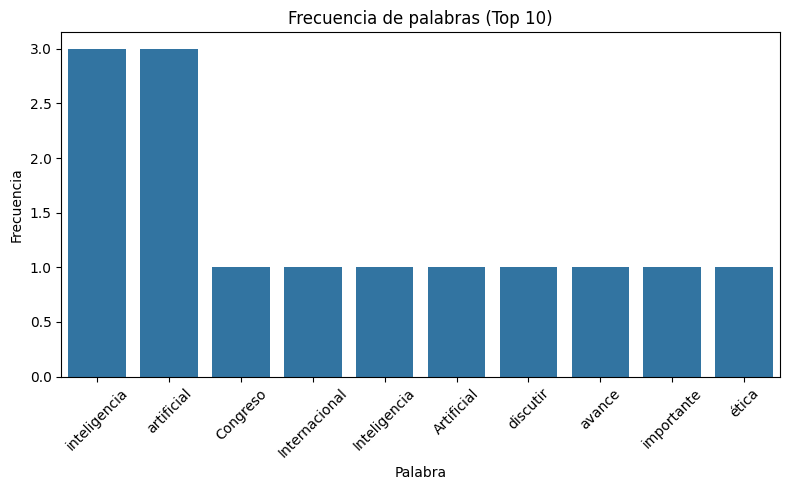

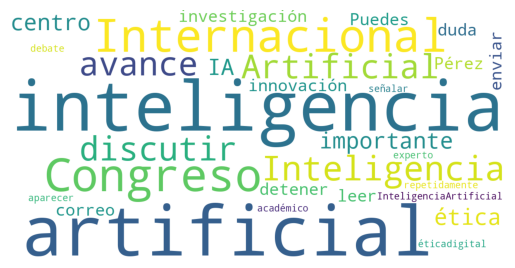

In [17]:
# Frecuencia de palabras
frecuencias = Counter(tokens_limpios)

df_freq = pd.DataFrame(frecuencias.most_common(10), columns=["Palabra", "Frecuencia"])
print(df_freq)

# Graficar en una grafica de barras la frecuencia de las 10 alabra mas mencionadas
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x="Palabra", y="Frecuencia")

plt.xticks(rotation=45)
plt.title("Frecuencia de palabras (Top 10)")
plt.tight_layout()
plt.show()

print("\n")
# Nube de palabras
wc = WordCloud(width=1200, height=600, background_color="white")
wc.generate_from_frequencies(frecuencias)

plt.figure()
plt.imshow(wc)
plt.axis("off")
plt.show()